In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


<Axes: >

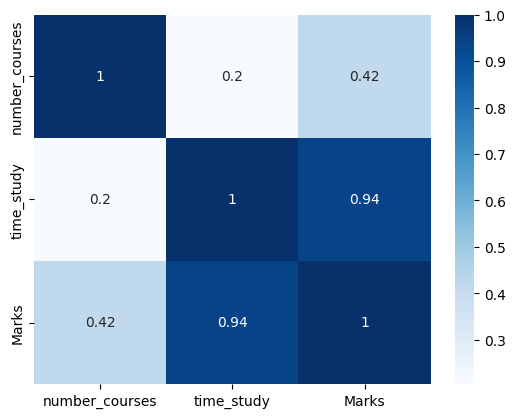

In [3]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

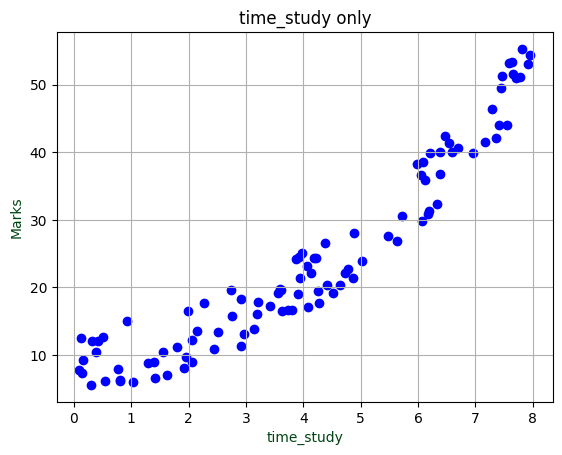

In [4]:
number_courses = df['number_courses'].to_numpy()
time_study = df['time_study'].to_numpy()
Marks = df['Marks'].to_numpy()

fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel('time_study', color='#004411')
ax.set_ylabel('Marks', color='#004411')
ax.set_title('time_study only')
ax.scatter(time_study, Marks, color='blue')

plt.show()

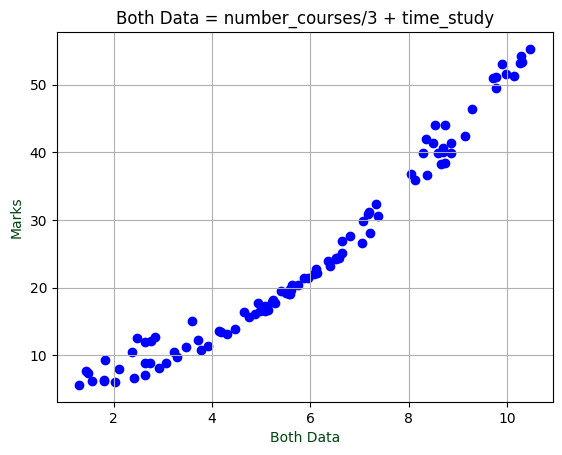

In [5]:
both_data = number_courses/3 + time_study

fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel('Both Data', color='#004411')
ax.set_ylabel('Marks', color='#004411')
ax.set_title('Both Data = number_courses/3 + time_study')
ax.scatter(both_data, Marks, color='blue')

plt.show()

In [6]:
train_x = both_data
train_y = Marks

mean_train_x = np.mean(train_x)
mean_train_y = np.mean(train_y)

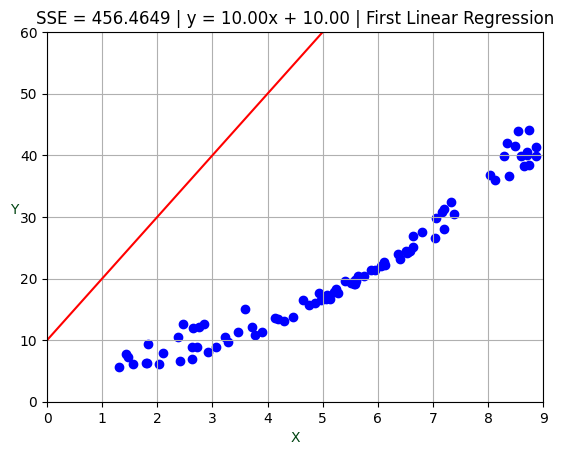

In [7]:
# y = mx + c
slope = 10
y_intercept = 10

def graph(fig, ax, title, scatter_x, scatter_y, plot_x, plot_y):
  ax.set(xlim=[0, 9], ylim=[0, 60])
  ax.grid()
  ax.set_title(title)
  ax.set_xlabel('X', color='#004411')
  ax.set_ylabel('Y', color='#004411', rotation=0)

  ax.scatter(scatter_x, scatter_y, color='blue')
  ax.plot(plot_x, plot_y, color='red')
  plt.show()

def y_hat(slope, x, y_intercept):
  return (slope * x) + y_intercept

def sse(y, y_hat):
  return (y - y_hat)**2

x = np.linspace(0, 500, 2)
y = y_hat(slope, x, y_intercept)

error = np.sqrt(np.sum(np.array(sse(train_y, y_hat(slope, train_x, y_intercept)))))

fig, ax = plt.subplots()
graph(fig, ax, f'SSE = {error:.4f} | y = {slope:.2f}x + {y_intercept:.2f} | First Linear Regression', train_x, train_y, x, y)

In [8]:
def partial_d_slope(sse, y_hat, delta_x, slope, y_intercept, x, y):
  return (sse(y, y_hat(slope, x, y_intercept)) - sse(y, y_hat(slope + delta_x, x, y_intercept))) / (slope - (slope + delta_x))

def partial_d_y_intercept(sse, y_hat, delta_x, slope, y_intercept, x, y):
  return (sse(y, y_hat(slope, x, y_intercept)) - sse(y, y_hat(slope, x, y_intercept + delta_x))) / (y_intercept - (y_intercept + delta_x))

def summation(sse, y_hat, delta_x, slope, y_intercept, train_x, train_y, lr):
  sum_slope, sum_y_intercept = 0, 0
  for x, y in zip(train_x, train_y):
    sum_slope += partial_d_slope(sse, y_hat, delta_x, slope, y_intercept, x, y)
    sum_y_intercept += partial_d_y_intercept(sse, y_hat, delta_x, slope, y_intercept, x, y)

  return (lr * sum_slope), (lr * sum_y_intercept)

Epoch = 230 | SSE = 46.9711 | Formula --> y = 4.28x + (0.65) 
Epoch = 460 | SSE = 38.0354 | Formula --> y = 4.87x + (-3.41) 
Epoch = 690 | SSE = 35.6070 | Formula --> y = 5.15x + (-5.37) 
Epoch = 920 | SSE = 35.0107 | Formula --> y = 5.29x + (-6.33) 
Epoch = 1150 | SSE = 34.8689 | Formula --> y = 5.36x + (-6.79) 
Epoch = 1380 | SSE = 34.8354 | Formula --> y = 5.39x + (-7.02) 
Epoch = 1610 | SSE = 34.8275 | Formula --> y = 5.40x + (-7.12) 
Epoch = 1840 | SSE = 34.8256 | Formula --> y = 5.41x + (-7.18) 
Epoch = 2070 | SSE = 34.8252 | Formula --> y = 5.41x + (-7.20) 
Epoch = 2300 | SSE = 34.8251 | Formula --> y = 5.42x + (-7.22) 


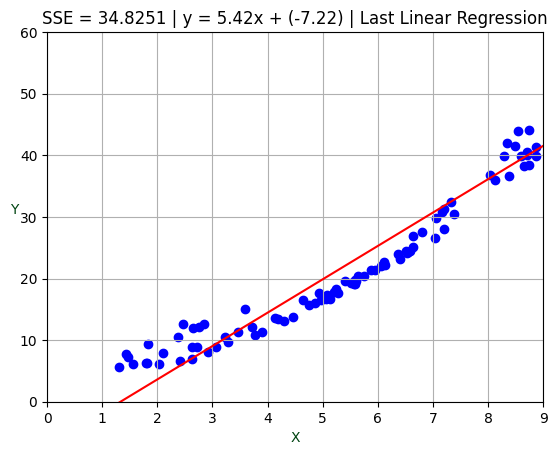

In [9]:
col_slope, col_y_intercept = [], []
epoch = 2_300
lr = 0.0001
delta_x = 10**(-6)

n = 230
for i in range(0, epoch):
  temp_slope, temp_y_intercept = summation(sse, y_hat, delta_x, slope, y_intercept, train_x, train_y, lr)

  new_slope = slope - temp_slope
  new_y_intercept = y_intercept - temp_y_intercept

  slope = new_slope
  y_intercept = new_y_intercept

  col_slope.append(new_slope)
  col_y_intercept.append(new_y_intercept)

  error = np.sqrt(np.sum(np.array(sse(train_y, y_hat(slope, train_x, y_intercept)))))
  if (n-1) == i:
    print(f"Epoch = {i+1} | SSE = {error:.4f} | Formula --> y = {slope:.2f}x + ({y_intercept:.2f}) ")
    n += 230

x = np.linspace(0, 500, 2)
y = y_hat(slope, x, y_intercept)

fig, ax = plt.subplots()
graph(fig, ax, f'SSE = {error:.4f} | y = {slope:.2f}x + ({y_intercept:.2f}) | Last Linear Regression', train_x, train_y, x, y)